In [1]:
import sys
sys.path.append('../xCell/')
import xcell
import healpy as hp
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True


def scale_bin_map(mask, c):
    m = mask.copy()
    goodpix = mask != 0
    m[goodpix] = c
    return m

def get_fsky(m_a1, m_a2):
    fsky = np.mean(((m_a1 > 0) & (m_a2 > 0)))
    return fsky


nside = 512
coords = 'C'

eBOSS__0 = xcell.mappers.MappereBOSS({'data_catalogs':
        ['/mnt/extraspace/gravityls_3/S8z/data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits',
         '/mnt/extraspace/gravityls_3/S8z/data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'],
    'random_catalogs':
        ['/mnt/extraspace/gravityls_3/S8z/data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits',
         '/mnt/extraspace/gravityls_3/S8z/data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
                                      'coords': coords,
                                      'SDSS_name': 'QSO_0',

    'z_edges': [0, 1.5],
    'nside': nside})

DELS = xcell.mappers.MapperDELS({
    'data_catalogs': [
        '/mnt/extraspace/damonge/Datasets/DELS/Legacy_Survey_BASS-MZLS_galaxies-selection.fits',
        '/mnt/extraspace/damonge/Datasets/DELS/Legacy_Survey_DECALS_galaxies-selection.fits'],
    'zbin': 0,
    'binary_mask': '/mnt/extraspace/damonge/Datasets/DELS/Legacy_footprint_final_mask_cut_decm36.fits',
    'nl_analytic': True,
    'completeness_map': '/mnt/extraspace/damonge/Datasets/DELS/Legacy_footprint_completeness_mask_128.fits',
    'star_map': '/mnt/extraspace/damonge/Datasets/DELS/allwise_total_rot_1024.fits',
                                      'coords': coords,
    'nside': nside,
   }
)

# This mask is in nside 2048
CIB_mask = hp.read_map('/mnt/extraspace/damonge/Datasets/CIB_Lenz/545/2.5e+20_gp20/mask_bool.hpx.fits')
rot = hp.Rotator(coord=['G', coords])
CIB_mask = rot.rotate_map_pixel(CIB_mask)
CIB_mask = hp.ud_grade(CIB_mask, nside)

0.0 180.0 -180.0 180.0


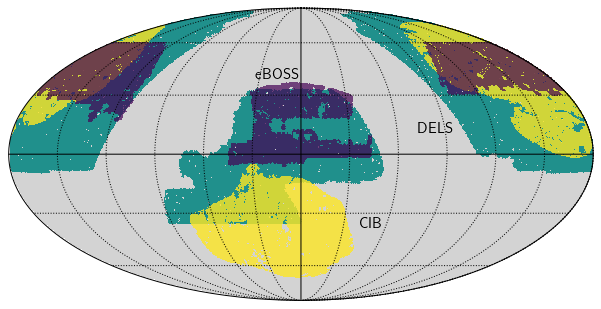

In [3]:
# For the transaprency to work you need to comment healpy/projaxes.py#L189
# See https://github.com/healpy/healpy/issues/765
eB0mask = scale_bin_map(eBOSS__0.get_mask(), -1)
dels0mask = scale_bin_map(DELS.get_mask(), 1)
cibmask = scale_bin_map(CIB_mask, 2)

cibalpha = scale_bin_map(cibmask, 0.8)
eB0alpha = scale_bin_map(eB0mask, 0.7)

dels0mask[dels0mask == 0] = hp.UNSEEN
hp.mollview(dels0mask, badcolor='lightgray', cbar=False, title='')
hp.mollview(cibmask, reuse_axes=True, alpha=cibalpha, cbar=False, title='')
hp.mollview(eB0mask, reuse_axes=True, alpha=eB0alpha, cbar=False, title='')
hp.graticule()

plt.text(-0.02, 0.52, 'eBOSS', fontsize=15, color='black', horizontalalignment='right')
plt.text(0.80, 0.15, 'DELS', fontsize=15, color='black', horizontalalignment='left')
plt.text(0.4, -0.5, 'CIB', fontsize=15, color='black', horizontalalignment='left')

plt.savefig('CIB_eBOSS_DELS_footprint.pdf')
plt.show()
plt.close()

In [4]:
print(f'fsky(CIB x DELS) = {get_fsky(CIB_mask, DELS.get_mask())}')
print(f'fsky(CIB x eBOSS) = {get_fsky(CIB_mask, eBOSS__0.get_mask())}')

fsky(CIB x DELS) = 0.13234265645345053
fsky(CIB x eBOSS) = 0.05534966786702474
